In [1]:
import sys
import pandas as pd
import numpy as np
import collections

import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt

from matplotlib import font_manager as fm
from  matplotlib import cm

In [96]:
sh1 = pd.read_json('data/SH_ty2.json')
wx1 = pd.read_json('data/WX_yao.json')
wx = {y: sx for sx, yao in wx1.loc["药物"].iteritems() for y in yao}

In [3]:
class Shanghan():
    def __init__(self):
        self.sh1 = pd.read_json('data/SH_ty2.json')
        self.wx1 = pd.read_json('data/WX_yao.json')
        self.wx = {y: sx for sx, yao in self.wx1.loc["药物"].iteritems() for y in yao}
        
    def count_fang(self,fang):
        a = self.sh1.loc['名'].str.match(fang).sum()
        print(a)
        
    def count_fang_all(self):
        l1 = {}
        for i in self.sh1.loc['名'].items():
            l1[i[1]] = self.sh1.loc['名'].str.match(i[1]).sum()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)
        print(l2)
        
    def count_yao(self,yao):
        q1 = self.sh1.loc['方']
        q2 = q1[q1.apply(lambda x:yao in x)].count()
        print(q2)
        
    def count_yao_all(self):
        q1 = self.sh1.loc['方']
        l1 = {}
        for i ,j in self.sh1.loc['方'].iteritems():
            for g in j:
                l1[g]= q1[q1.apply(lambda x:g in x)].count()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)
                
        print(l2)
        
    def draw_dir_all(self):#画每一个方剂的方向图
        plt.rcParams['figure.figsize'] = [18,13]
        plt.style.use('fivethirtyeight')
        fang = self.sh1.loc['方']
        sx = [self.wx.get(y,"暂不明") for f in fang for y in f]
        sx_len = len(sx)
        qq = {y: cnt / sx_len for y, cnt in collections.Counter(sx).items()}
        qq1 = sorted(qq.items(),key = lambda item: item[1], reverse=True)
        ss = {}
        for i in qq1:
            #print(i)
            ss[i[0]]=i[1]
        
        #----------------下面是画饼图-----------------------------------
        
        labels = list(ss.keys())
        X = list(ss.values())
        fig, ax = plt.subplots(figsize=(11,11))
        
        colors = cm.rainbow(np.arange(len(X))/len(X))
        #print(X)
        patches, texts, autotexts = ax.pie(X, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)
        
        proptease = fm.FontProperties()
        proptease.set_size('x-large')
        
        plt.setp(autotexts, fontproperties=proptease)
        plt.setp(texts, fontproperties=proptease)

        plt.title("伤寒全部方剂五行方向图", pad = 30)
        plt.axis('equal')
        plt.show()  
        
    def count_yao_all_draw(self):
        plt.style.use('fivethirtyeight')#这个图的设定字体很清晰
        plt.rcParams['figure.figsize'] = [18,13]
        #plt.xlabel('药物')
        plt.title('伤寒论药物用量排名分析(前10名)', pad = 90)
        plt.xticks(fontsize=25)#x轴的字体大小
        plt.yticks(fontsize=30)
        
        
        q1 = self.sh1.loc['方']
        l1 = {}
        t_list = []
        n_list = []
        for i ,j in self.sh1.loc['方'].iteritems():
            for g in j:
                l1[g]= q1[q1.apply(lambda x:g in x)].count()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)
            
        for i in l2[:10]:
            t_list.append(i[0])
            n_list.append(i[1])
            #plt.text(i[1],)
        
        x = np.arange(10)
        ys = [i+x+(i*x)**2 for i in range(10)]
        colors = cm.rainbow(np.linspace(0, 1, len(ys)))
            
        plt.bar(t_list,n_list,color=colors)
        plt.show()
        
        
            
        

In [4]:
wx1 = pd.read_json('data/WX_yao.json')
wx = {y: sx for sx, yao in wx1.loc["药物"].iteritems() for y in yao}

In [5]:
fang = sh1.loc['方']
sx = [wx.get(y,"暂不明") for f in fang for y in f]
sx_len = len(sx)
qq = {y: cnt / sx_len for y, cnt in collections.Counter(sx).items()}

In [6]:
qq1 = sorted(qq.items(),key = lambda item: item[1], reverse=True)

In [7]:
qq1

[('向上(木)', 0.2898550724637681),
 ('中轴(土)', 0.2768115942028985),
 ('向下(金)', 0.13478260869565217),
 ('火', 0.11304347826086956),
 ('暂不明', 0.09420289855072464),
 ('收藏(水)', 0.09130434782608696)]

In [8]:
ss={}
for i in qq1:
    print(i)
    ss[i[0]]=i[1]

('向上(木)', 0.2898550724637681)
('中轴(土)', 0.2768115942028985)
('向下(金)', 0.13478260869565217)
('火', 0.11304347826086956)
('暂不明', 0.09420289855072464)
('收藏(水)', 0.09130434782608696)


In [9]:
ss

{'向上(木)': 0.2898550724637681,
 '中轴(土)': 0.2768115942028985,
 '向下(金)': 0.13478260869565217,
 '火': 0.11304347826086956,
 '暂不明': 0.09420289855072464,
 '收藏(水)': 0.09130434782608696}

In [10]:
collections.Counter(sx).items()

dict_items([('向上(木)', 200), ('向下(金)', 93), ('中轴(土)', 191), ('收藏(水)', 63), ('火', 78), ('暂不明', 65)])

In [11]:
sx_len

690

In [12]:
collections.Counter(sx).items()

dict_items([('向上(木)', 200), ('向下(金)', 93), ('中轴(土)', 191), ('收藏(水)', 63), ('火', 78), ('暂不明', 65)])

In [13]:
for y, cnt in collections.Counter(sx).items():
    print(cnt/sx_len)

0.2898550724637681
0.13478260869565217
0.2768115942028985
0.09130434782608696
0.11304347826086956
0.09420289855072464


In [14]:
q1 = sh1.loc['方']
l1 = {}
for i ,j in sh1.loc['方'].iteritems():
    for g in j:
        l1[g]= q1[q1.apply(lambda x:g in x)].count()
l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)

In [16]:
sh1.loc['名'].index

Index(['1号', '2号', '3号', '4号', '5号', '6号', '7号', '8号', '9号', '10号',
       ...
       '141号', '142号', '143号', '144号', '145号', '146号', '147号', '148号', '149号',
       '150号'],
      dtype='object', length=150)

In [17]:
sh1.T.loc['2号']['名']

'桂枝加葛根汤'

In [18]:
a = sh1.loc['证'].apply(lambda x: set(x['体证']))

In [19]:
b = sh1.loc['名'].apply(lambda x: x)

In [20]:
c = b[b.apply(lambda x: '四逆汤' == x)].index[0]

In [29]:
d1 = sh1[c]

In [30]:
d1

原文    {'对应证原文': ['若重发汗。复加烧针者。四逆汤主之。'], '方剂原文': '甘草二两...
名                                                   四逆汤
方                 {'附子': '1枚', '炙甘草': '2两', '干姜': '1两'}
经                               {'阴阳': '阳', '三经': '太阳'}
证     {'体证': ['四肢冷', '长期焦虑', '自感体虚', '长期抑郁', '没有精神',...
Name: 14号, dtype: object

In [32]:
pd.Series(d1['方'])

附子     1枚
炙甘草    2两
干姜     1两
dtype: object

In [33]:
pd.Series(d1['原文'])

对应证原文                          [若重发汗。复加烧针者。四逆汤主之。]
方剂原文                 甘草二两[炙] 干姜一两半 附子一枚[生用 去皮 破八片]
服药原文     右三味。以水三升。煮取一升二合。去滓。分温再服。 【强人可大附子一枚。干姜三两。】
dtype: object

In [53]:
bz = {"四肢冷"}

In [54]:
a = sh1.loc['证'].apply(lambda x: set(x['体证']))

In [55]:
list(a[a.apply(lambda x: bz <= x)].index)

['14号',
 '41号',
 '88号',
 '118号',
 '119号',
 '122号',
 '123号',
 '125号',
 '126号',
 '127号',
 '132号',
 '133号',
 '143号',
 '144号',
 '145号',
 '146号']

In [60]:
b = a[a.apply(lambda x: bz <= x)].index

In [64]:
sh1[b].loc['名']

14号             四逆汤
41号             四逆汤
88号             四逆汤
118号          通脉四逆汤
119号            四逆散
122号            四逆汤
123号            乌梅丸
125号          当归四逆汤
126号    当归四逆加吴茱萸生姜汤
127号            四逆汤
132号          通脉四逆汤
133号           白头翁汤
143号            四逆汤
144号       通脉四逆加猪胆汤
145号            烧裈散
146号          枳实栀子汤
Name: 名, dtype: object

In [75]:
b = sh1.loc['名'].apply(lambda x: x)
c = b[b.apply(lambda x: '桂枝汤' == x)].index[0]
d = sh1[c]

In [76]:
d.loc['方']

{'桂枝': '3两', '芍药': '3两', '炙甘草': '2两', '生姜': '3两', '大枣': '12枚'}

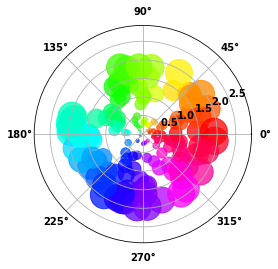

In [79]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

X = 150 这个区间,从第一个药开始
Y = 五行 水在最下,火在最上
那可以这样设定
水 30, 金 60 土 90 木 120 火 150
那么Y也是150

In [81]:
wx_a = {'水':30,
        '金':60,
        '土':90,
        '木':120,
        '火':150  
       }

In [80]:
sh1.shape

(5, 150)

In [82]:
wx_a

{'水': 30, '金': 60, '土': 90, '木': 120, '火': 150}

In [88]:
fang = sh1.loc['方']

In [89]:
sx = [wx.get(y,"暂不明") for f in fang for y in f]

In [126]:
wx

{'炙甘草': '中轴(土)',
 '人参': '中轴(土)',
 '大枣': '中轴(土)',
 '茯苓': '中轴(土)',
 '胶饴': '中轴(土)',
 '麦门冬': '中轴(土)',
 '升麻': '中轴(土)',
 '瓜蒂': '中轴(土)',
 '鸡子黄': '中轴(土)',
 '芍药': '向下(金)',
 '柴胡': '向下(金)',
 '杏仁': '向下(金)',
 '石膏': '向下(金)',
 '五味子': '向下(金)',
 '枳实': '向下(金)',
 '铅丹': '向下(金)',
 '龙骨': '向下(金)',
 '牡蛎': '向下(金)',
 '豉': '向下(金)',
 '香豉': '收藏(水)',
 '大黄': '火',
 '芒硝': '火',
 '黄连': '火',
 '黄芩': '火',
 '泽泻': '火',
 '厚朴': '火',
 '通草': '火',
 '葱白': '火',
 '地黄': '收藏(水)',
 '麻黄': '收藏(水)',
 '葛根': '收藏(水)',
 '白术': '收藏(水)',
 '知母': '收藏(水)',
 '猪苓': '收藏(水)',
 '栀子': '收藏(水)',
 '竹叶': '收藏(水)',
 '生姜': '向上(木)',
 '附子': '向上(木)',
 '桂枝': '向上(木)',
 '半夏': '向上(木)',
 '干姜': '向上(木)',
 '粳米': '向上(木)',
 '细辛': '向上(木)',
 '阿胶': '向上(木)',
 '赤小豆': '向上(木)',
 '蜀椒': '向上(木)'}

In [97]:
wx

{'炙甘草': '中轴(土)',
 '人参': '中轴(土)',
 '大枣': '中轴(土)',
 '茯苓': '中轴(土)',
 '胶饴': '中轴(土)',
 '麦门冬': '中轴(土)',
 '升麻': '中轴(土)',
 '瓜蒂': '中轴(土)',
 '鸡子黄': '中轴(土)',
 '芍药': '向下(金)',
 '柴胡': '向下(金)',
 '杏仁': '向下(金)',
 '石膏': '向下(金)',
 '五味子': '向下(金)',
 '枳实': '向下(金)',
 '铅丹': '向下(金)',
 '龙骨': '向下(金)',
 '牡蛎': '向下(金)',
 '豉': '向下(金)',
 '香豉': '收藏(水)',
 '大黄': '火',
 '芒硝': '火',
 '黄连': '火',
 '黄芩': '火',
 '泽泻': '火',
 '厚朴': '火',
 '通草': '火',
 '葱白': '火',
 '地黄': '收藏(水)',
 '麻黄': '收藏(水)',
 '葛根': '收藏(水)',
 '白术': '收藏(水)',
 '知母': '收藏(水)',
 '猪苓': '收藏(水)',
 '栀子': '收藏(水)',
 '竹叶': '收藏(水)',
 '生姜': '向上(木)',
 '附子': '向上(木)',
 '桂枝': '向上(木)',
 '半夏': '向上(木)',
 '干姜': '向上(木)',
 '粳米': '向上(木)',
 '细辛': '向上(木)',
 '阿胶': '向上(木)',
 '赤小豆': '向上(木)',
 '蜀椒': '向上(木)'}

In [138]:
yy = {}
for i in wx1.loc["值"]:
    for j in wx1.loc["药物"]:
        for g in j:
            yy[g] = i

In [139]:
yy

{'炙甘草': 120,
 '人参': 120,
 '大枣': 120,
 '茯苓': 120,
 '胶饴': 120,
 '麦门冬': 120,
 '升麻': 120,
 '瓜蒂': 120,
 '鸡子黄': 120,
 '芍药': 120,
 '柴胡': 120,
 '杏仁': 120,
 '石膏': 120,
 '五味子': 120,
 '枳实': 120,
 '铅丹': 120,
 '龙骨': 120,
 '牡蛎': 120,
 '豉': 120,
 '香豉': 120,
 '大黄': 120,
 '芒硝': 120,
 '黄连': 120,
 '黄芩': 120,
 '泽泻': 120,
 '厚朴': 120,
 '通草': 120,
 '葱白': 120,
 '地黄': 120,
 '麻黄': 120,
 '葛根': 120,
 '白术': 120,
 '知母': 120,
 '猪苓': 120,
 '栀子': 120,
 '竹叶': 120,
 '生姜': 120,
 '附子': 120,
 '桂枝': 120,
 '半夏': 120,
 '干姜': 120,
 '粳米': 120,
 '细辛': 120,
 '阿胶': 120,
 '赤小豆': 120,
 '蜀椒': 120}